In [2]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data from a CSV

# Configure data Types for the DataFrame creation.  Integers are left out because NaNs generate an error
dtypes = {'ID': str, 
          'Device ID': str, 
          'Vehicle Type': 'category', 
          'Trip Duration': float, 
          'Trip Distance': float, 
          'Census Tract Start': str, 
          'Census Tract End': str}

# Configure ID as the index column.
index_cols = ['ID']

# Create the dataframe.
scooters = pd.read_csv('sco.csv', dtype=dtypes, index_col=index_cols)

In [4]:
# Remove e-bikes, which are out of scope of this project:
total_rows = scooters.shape[0]
scooters = scooters[scooters['Vehicle Type'] == 'scooter']
e_bikes_dropped = total_rows - scooters.shape[0]
print('E-Bikes dropped: ' + str(e_bikes_dropped))

E-Bikes dropped: 662869


In [5]:
# Save the size of the original dataframe
total_rows = scooters.shape[0]
print('Original scooter entries: ' + str(total_rows))

Original scooter entries: 14385766


In [55]:
# Find which columns have na values (commented for cleaner output)
print(scooters.isna().any())

# Initialize rows_remaining to count as rows are removed
rows_remaining = scooters.shape[0]

Device ID                   False
Vehicle Type                False
Trip Duration               False
Trip Distance               False
Start Time                  False
End Time                    False
Modified Date               False
Month                       False
Hour                        False
Day of Week                 False
Council District (Start)     True
Council District (End)       True
Year                        False
Census Tract Start           True
Census Tract End             True
Start Time (US/Central)      True
End Time (US/Central)        True
dtype: bool


In [56]:
# Print the data types to show each column is the correct type.
print('Column Data types:')
print(scooters.dtypes)

Column Data types:
Device ID                     object
Vehicle Type                category
Trip Duration                float64
Trip Distance                float64
Start Time                    object
End Time                      object
Modified Date                 object
Month                          int64
Hour                           int64
Day of Week                    int64
Council District (Start)     float64
Council District (End)       float64
Year                           int64
Census Tract Start            object
Census Tract End              object
Start Time (US/Central)       object
End Time (US/Central)         object
dtype: object


In [57]:
scooters = scooters.drop("Start Time", axis='columns')
scooters = scooters.drop("End Time", axis='columns')
scooters = scooters.rename(columns={'Start Time (US/Central)': 'Start Time', 'End Time (US/Central)': 'End Time'})


In [58]:
scooters

Device ID  \
ID                                                                           
5a23a573-418b-443b-8dc8-d7963fe2b063  5cee599e-832c-4fa5-9050-dcc00e3790f3   
dac12ecc-0f79-4faa-a626-674a7c9f3df2  20014eea-19b2-4643-b3b3-63c31e76e57b   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e  2cad7083-7af6-4b22-8540-9b9dfffc2f58   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb  fde91af9-deb8-41cc-9ddc-472ff7653d90   
258bea73-5b14-4970-950e-1a1a7c3d715f  b748cae7-7f46-48a7-834d-980565210bf6   
...                                                                    ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c  e19ae320-f29f-4771-97ec-feed9d5b1328   
1b6c2dd0-7136-4863-94ac-f2c98f390139  06e372b9-0d54-4c21-b7e5-4102d57debcd   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd  17c741fd-373b-4af9-ae84-c70eda4dc341   
c77cceda-9ab8-4699-a06d-d96569a961ee  1e6cfd15-76cb-4fc5-a237-3e73a7ccc342   
e407b61d-cf55-4a07-bcb3-66498c76394f  18470ae6-a759-4af6-867a-a6ad9f6cc4b1   

                                     Vehicle Type  Trip Duration  \
ID                                                                 
5a23a573-418b-443b-8dc8-d7963fe2b063      scooter         2184.0   
dac12ecc-0f79-4faa-a626-674a7c9f3df2      scooter          705.0   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e      scooter          189.0   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb      scooter          203.0   
258bea73-5b14-4970-950e-1a1a7c3d715f      scooter          166.0   
...                                           ...            ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c      scooter          321.0   
1b6c2dd0-7136-4863-94ac-f2c98f390139      scooter          184.0   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd      scooter         1323.0   
c77cceda-9ab8-4699-a06d-d96569a961ee      scooter         2422.0   
e407b61d-cf55-4a07-bcb3-66498c76394f      scooter          602.0   

                                      Trip Distance           Modified Date  \
ID                                                                            
5a23a573-418b-443b-8dc8-d7963fe2b063    4254.483965  11/03/2021 03:16:12 AM   
dac12ecc-0f79-4faa-a626-674a7c9f3df2    2670.868099  11/03/2021 03:16:12 AM   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e     258.938744  11/03/2021 03:16:10 AM   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb     354.088194  11/03/2021 03:16:11 AM   
258bea73-5b14-4970-950e-1a1a7c3d715f     757.000000  02/08/2022 03:12:27 AM   
...                                             ...                     ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c    1095.000000  03/21/2022 11:15:37 PM   
1b6c2dd0-7136-4863-94ac-f2c98f390139     710.000000  03/21/2022 11:15:37 PM   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd    4492.000000  03/20/2022 05:18:20 AM   
c77cceda-9ab8-4699-a06d-d96569a961ee    3104.000000  03/20/2022 05:18:20 AM   
e407b61d-cf55-4a07-bcb3-66498c76394f    2222.000000  03/20/2022 05:18:20 AM   

                                      Month  Hour  Day of Week  \
ID                                                               
5a23a573-418b-443b-8dc8-d7963fe2b063     11     1            1   
dac12ecc-0f79-4faa-a626-674a7c9f3df2     11     1            1   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e     11     1            1   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb     11     1            1   
258bea73-5b14-4970-950e-1a1a7c3d715f      1    17            6   
...                                     ...   ...          ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c      3    22            6   
1b6c2dd0-7136-4863-94ac-f2c98f390139      3    22            6   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd      3     4            5   
c77cceda-9ab8-4699-a06d-d96569a961ee      3     4            5   
e407b61d-cf55-4a07-bcb3-66498c76394f      3     4            5   

                                      Council District (Start)  \
ID                                                               
5a23a573-418b-443b-8dc8-d7963fe2b063                       9.0   
dac12ecc-0f79-4faa-a626-674a7c9f3df2                       3.0   
d6bdc5e8-dec0-

In [59]:
scooters.columns

Index(['Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
       'Modified Date', 'Month', 'Hour', 'Day of Week',
       'Council District (Start)', 'Council District (End)', 'Year',
       'Census Tract Start', 'Census Tract End', 'Start Time', 'End Time'],
      dtype='object')

In [60]:
'''Remove rows for which date time, Census Tract End or Census Tract Start are empty.
The entire row should be removed because prediction will not be possible on rows missing this information.
It also does not make sense to fill these columns, as every trip/row is a discrete event.'''
scooters = scooters.dropna(how='any', subset=['Start Time', 'End Time', 'Vehicle Type','Census Tract Start', 'Census Tract End'])

# Determine how many rows were removed.
na_rows_dropped = rows_remaining - scooters.shape[0]
rows_remaining = scooters.shape[0]
print('NA rows dropped: ' + str(na_rows_dropped))


# Check if any Na values remain. (Commented to clean output)
print(scooters.isna().any())

NA rows dropped: 4185
Device ID                   False
Vehicle Type                False
Trip Duration               False
Trip Distance               False
Modified Date               False
Month                       False
Hour                        False
Day of Week                 False
Council District (Start)     True
Council District (End)       True
Year                        False
Census Tract Start          False
Census Tract End            False
Start Time                  False
End Time                    False
dtype: bool


In [61]:
# Now these columns can be converted to int (importing as int generated errors from the NaN values):
scooters['Day of Week'] = scooters['Day of Week'].astype('int8')
scooters['Month'] = scooters['Month'].astype('int8')
scooters['Hour'] = scooters['Hour'].astype('int8')
scooters['Year'] = scooters['Year'].astype('int16')

C:\Users\俊俊\AppData\Local\Temp\ipykernel_19248\4046334867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scooters['Day of Week'] = scooters['Day of Week'].astype('int8')
C:\Users\俊俊\AppData\Local\Temp\ipykernel_19248\4046334867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scooters['Month'] = scooters['Month'].astype('int8')
C:\Users\俊俊\AppData\Local\Temp\ipykernel_19248\4046334867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [62]:
# %%time 

# Convert date columns to datetimes. 
# Do this instead of parse_dates in read_csv to take advantage of any reduced number of rows.
# This also allows format to be specified, which runs faster than making pandas guess the format.
scooters['Start Time'] = pd.to_datetime(scooters['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
scooters['End Time'] = pd.to_datetime(scooters['End Time'], format='%m/%d/%Y %I:%M:%S %p')
scooters['Modified Date'] = pd.to_datetime(scooters['Modified Date'], format='%m/%d/%Y %I:%M:%S %p')

C:\Users\俊俊\AppData\Local\Temp\ipykernel_19248\746289836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scooters['Start Time'] = pd.to_datetime(scooters['Start Time'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\俊俊\AppData\Local\Temp\ipykernel_19248\746289836.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scooters['End Time'] = pd.to_datetime(scooters['End Time'], format='%m/%d/%Y %I:%M:%S %p')
C:\Users\俊俊\AppData\Local\Temp\ipykernel_19248\746289836.py:8: SettingWithCopyWarning: 
A value is trying to

In [63]:
# Use describe to search for outliers
scooters.describe()

Trip Duration  Trip Distance                  Modified Date  \
count   1.438158e+07   1.438158e+07                       14381581   
mean    6.946498e+02   2.739926e+04  2020-04-25 01:24:27.161541632   
min    -3.423000e+03  -5.243139e+08            2019-04-16 21:08:24   
25%     2.360000e+02   4.820000e+02            2019-04-25 14:01:22   
50%     4.210000e+02   1.063000e+03            2019-11-10 05:21:12   
75%     7.880000e+02   2.010000e+03            2021-05-17 20:16:51   
max     5.330845e+06   2.239711e+09            2022-04-05 16:30:22   
std     4.206001e+03   4.579530e+06                            NaN   

              Month          Hour   Day of Week  Council District (Start)  \
count  1.438158e+07  1.438158e+07  1.438158e+07              1.438029e+07   
mean   6.731499e+00  1.263338e+01  3.507604e+00              7.709843e+00   
min    1.000000e+00  0.000000e+00  0.000000e+00              0.000000e+00   
25%    4.000000e+00  4.000000e+00  2.000000e+00              9.000000e+00   
50%    7.000000e+00  1.600000e+01  4.000000e+00              9.000000e+00   
75%    1.000000e+01  2.000000e+01  5.000000e+00              9.000000e+00   
max    1.200000e+01  2.300000e+01  6.000000e+00              1.000000e+01   
std    3.340217e+00  8.316250e+00  2.035823e+00              2.600286e+00   

       Council District (End)          Year                     Start Time  \
count            1.437928e+07  1.438158e+07                       14381581   
mean             7.637857e+00  2.019668e+03  2020-03-08 15:26:09.004530432   
min              0.000000e+00  2.018000e+03            2018-04-03 18:30:00   
25%              9.000000e+00  2.019000e+03            2019-03-18 22:45:00   
50%              9.000000e+00  2.019000e+03            2019-10-16 09:15:00   
75%              9.000000e+00  2.021000e+03            2021-05-16 13:30:00   
max              1.000000e+01  2.022000e+03            2022-04-04 10:45:00   
std              2.650184e+00  1.184568e+00                            NaN   

                            End Time  
count                       14381581  
mean   2020-03-08 15:37:48.887878400  
min              2018-04-03 19:00:00  
25%              2019-03-18 23:00:00  
50%              2019-10-16 09:15:00  
75%              2021-05-16 13:45:00  
max              2022-04-04 10:45:00  
std                              NaN

In [64]:
# Remove any rows that started or ended out of bounds
scooters = scooters[~scooters['Census Tract Start'].str.contains('OUT_OF_BOUNDS')]
scooters = scooters[~scooters['Census Tract End'].str.contains('OUT_OF_BOUNDS')]

# Get number of rows dropped
oob_rows_dropped = rows_remaining - scooters.shape[0]
rows_remaining = scooters.shape[0]
print('Out of Bounds entries dropped: ' + str(oob_rows_dropped))

Out of Bounds entries dropped: 53821


Before removing outliers:


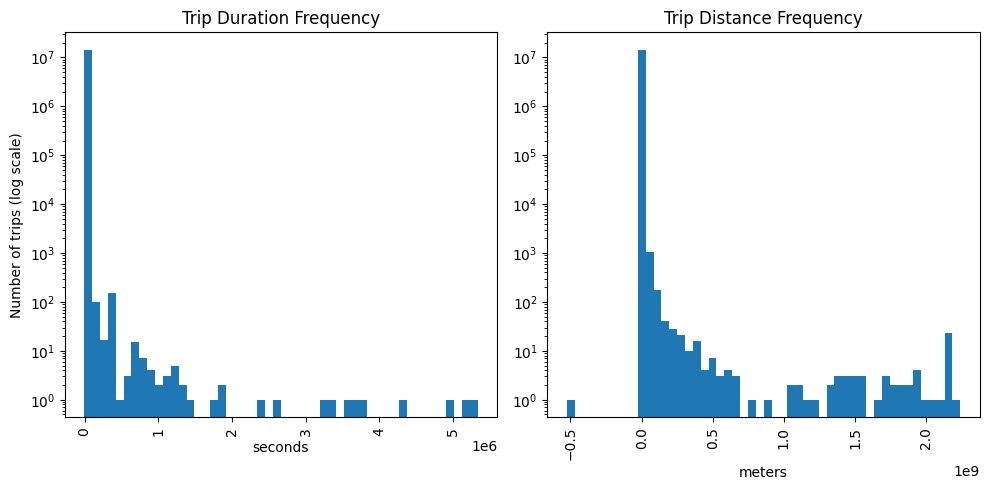

In [65]:
print('Before removing outliers:')

# Describe showed some negative and very high values for Trip Distance and Trip Duration.
# Use histograms to show how the values are distributed.

plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(scooters['Trip Duration'], bins=50, log=True)
plt.ylabel('Number of trips (log scale)')
plt.xlabel('seconds')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(scooters['Trip Distance'], bins=50, log=True)
plt.xlabel('meters')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

In [66]:
# Describe showed negative trip duration values. Remove these entries
scooters = scooters[scooters['Trip Duration'] > 0]

# Get number of rows dropped
neg_dur_rows_dropped = rows_remaining - scooters.shape[0]
rows_remaining = scooters.shape[0]
print('Negative duration dropped: ' + str(neg_dur_rows_dropped))

# Drop > a certain number of hours
time_thresh = 43200
scooters = scooters[scooters['Trip Duration'] < time_thresh]
high_dur_rows_dropped = rows_remaining - scooters.shape[0]
rows_remaining = scooters.shape[0]
print('Over ' + str(time_thresh/3600) + ' hours dropped: ' + str(high_dur_rows_dropped))

# Describe showed negative trip distance values. Remove these entries, and trips of 0 m.
scooters = scooters[scooters['Trip Distance'] > 0]
neg_dist_rows_dropped = rows_remaining - scooters.shape[0]
rows_remaining = scooters.shape[0]
print('Negative or 0 distance dropped: ' + str(neg_dist_rows_dropped))

# Remove entries over a certain amount for trip distance.  Average scooter battery range is 30 mi, with some capable of 50 mi.
dist_thresh = 80467.2
scooters = scooters[scooters['Trip Distance'] < dist_thresh]
high_dist_rows_dropped = rows_remaining - scooters.shape[0]
rows_remaining = scooters.shape[0]
print('Distance > ' + str(dist_thresh * 0.000621371) + ' mi dropped: ' + str(high_dist_rows_dropped))

Negative duration dropped: 5708
Over 12.0 hours dropped: 961
Negative or 0 distance dropped: 866160
Distance > 49.9999845312 mi dropped: 7582


After removing outliers:


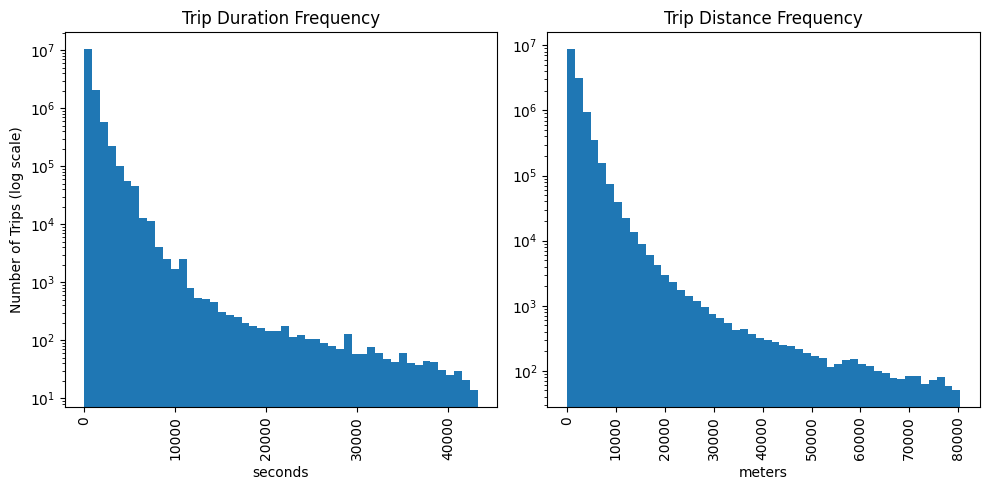

In [67]:

# Generate histograms to show effect of removing outliers                    
                     
                     
print('After removing outliers:')
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(scooters['Trip Duration'], bins=50, log=True)
plt.ylabel('Number of Trips (log scale)')
plt.xlabel('seconds')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(scooters['Trip Distance'], bins=50, log=True)
plt.xlabel('meters')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

In [68]:
# print number of rows dropped
print('Total entries remaining: ' + str(rows_remaining))
print('Percent removed: ' + str(((total_rows - rows_remaining)/total_rows)*100.00) + '%')

Total entries remaining: 13447349
Percent removed: 6.523232756601213%


In [69]:
# Print the data types to show each column is the correct type.
print('Column Data types:')
print(scooters.dtypes)

Column Data types:
Device ID                           object
Vehicle Type                      category
Trip Duration                      float64
Trip Distance                      float64
Modified Date               datetime64[ns]
Month                                 int8
Hour                                  int8
Day of Week                           int8
Council District (Start)           float64
Council District (End)             float64
Year                                 int16
Census Tract Start                  object
Census Tract End                    object
Start Time                  datetime64[ns]
End Time                    datetime64[ns]
dtype: object


In [70]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import geopandas as gpd
from shapely.geometry import LineString

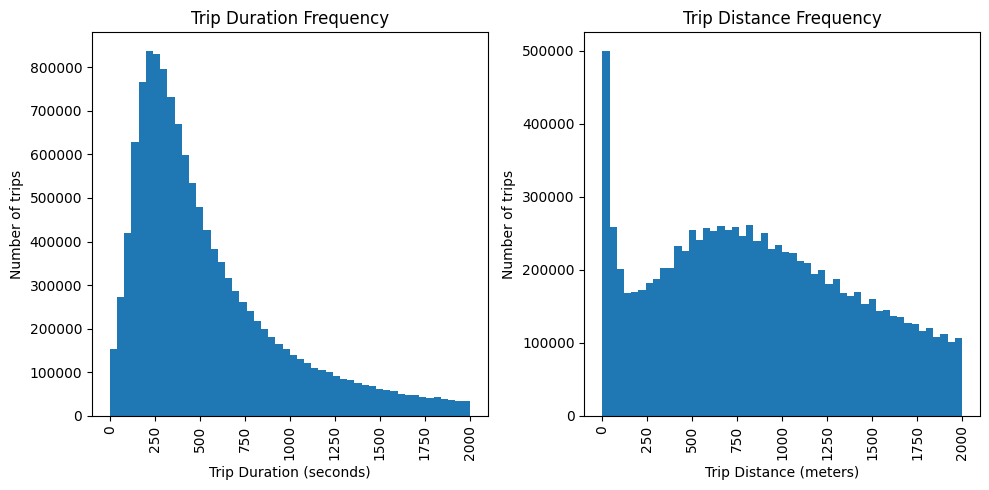

In [71]:
# Plot the histograms from above, with limits on the range
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(scooters['Trip Duration'], bins=50, range=(0,2000))
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of trips')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(scooters['Trip Distance'], bins=50, range=(0, 2000))
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Number of trips')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

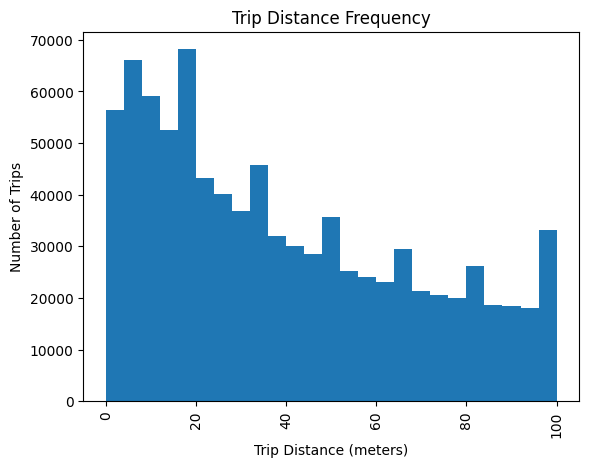

In [72]:
# Plot the 0-50 meters to see if there are any trends within the peak
plt.hist(scooters['Trip Distance'], bins=25, range=(0, 100))
plt.xlabel('Trip Distance (meters)')
plt.ylabel('Number of Trips')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.show()
plt.close()

In [73]:
import pandas as pd

# Assuming 'scooters' is your DataFrame
print('Number of Census Tract Starts: ' + str(len(set(scooters['Census Tract Start']))))
print('Number of Census Tract Ends: ' + str(len(set(scooters['Census Tract End']))))

# Combine the two Series and then create a DataFrame of unique values
combined_series = pd.concat([scooters['Census Tract Start'], scooters['Census Tract End']])
unique_cts = pd.DataFrame(combined_series.unique(), columns=['Unique Census Tracts'])

# Save the unique set of census tracts as a CSV. This will be modified in step 11.
unique_cts.to_csv('unique_census_tracts.csv')

# Print number of unique CTs
print('Number of unique Census Tracts: ' + str(len(unique_cts)))


Number of Census Tract Starts: 292
Number of Census Tract Ends: 305
Number of unique Census Tracts: 315


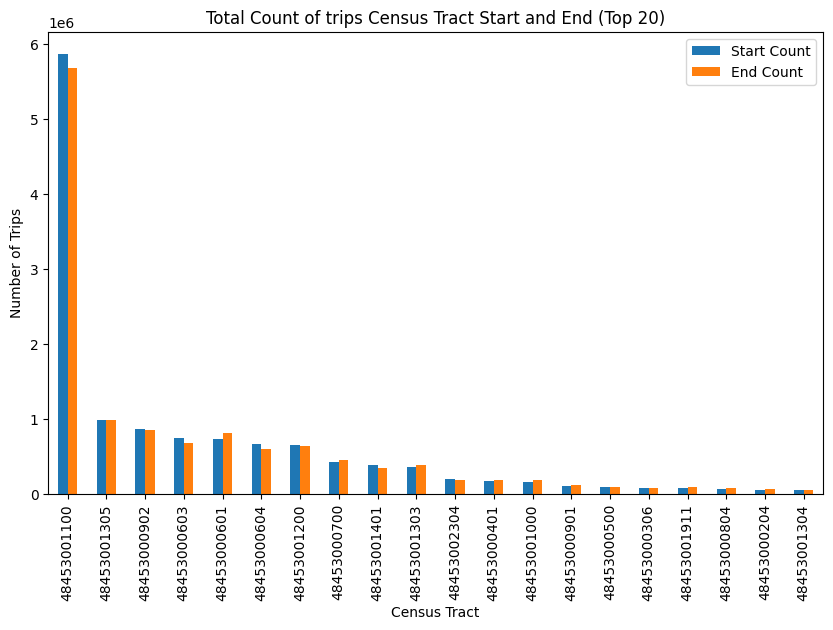

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'scooters' is your DataFrame

# Count how many trips started in each census tract
census_starts = pd.DataFrame(scooters['Census Tract Start'].value_counts())

# Count how many trips ended in each census tract
census_ends = pd.DataFrame(scooters['Census Tract End'].value_counts())

census_starts.columns = ['Start Count']
census_ends.columns = ['End Count']
# Join start and end counts and plot the top 20.
# Value counts sorts descending, inner join preserves census start's sorting.
census_comp = census_starts.join(census_ends, how='inner', lsuffix='_start', rsuffix='_end')

# Plotting
census_comp.head(20).plot(kind='bar', figsize=(10, 6))
plt.title('Total Count of trips Census Tract Start and End (Top 20)')
plt.xlabel('Census Tract')
plt.ylabel('Number of Trips')
plt.show()


In [75]:
print(census_starts.columns)

Index(['Start Count'], dtype='object')


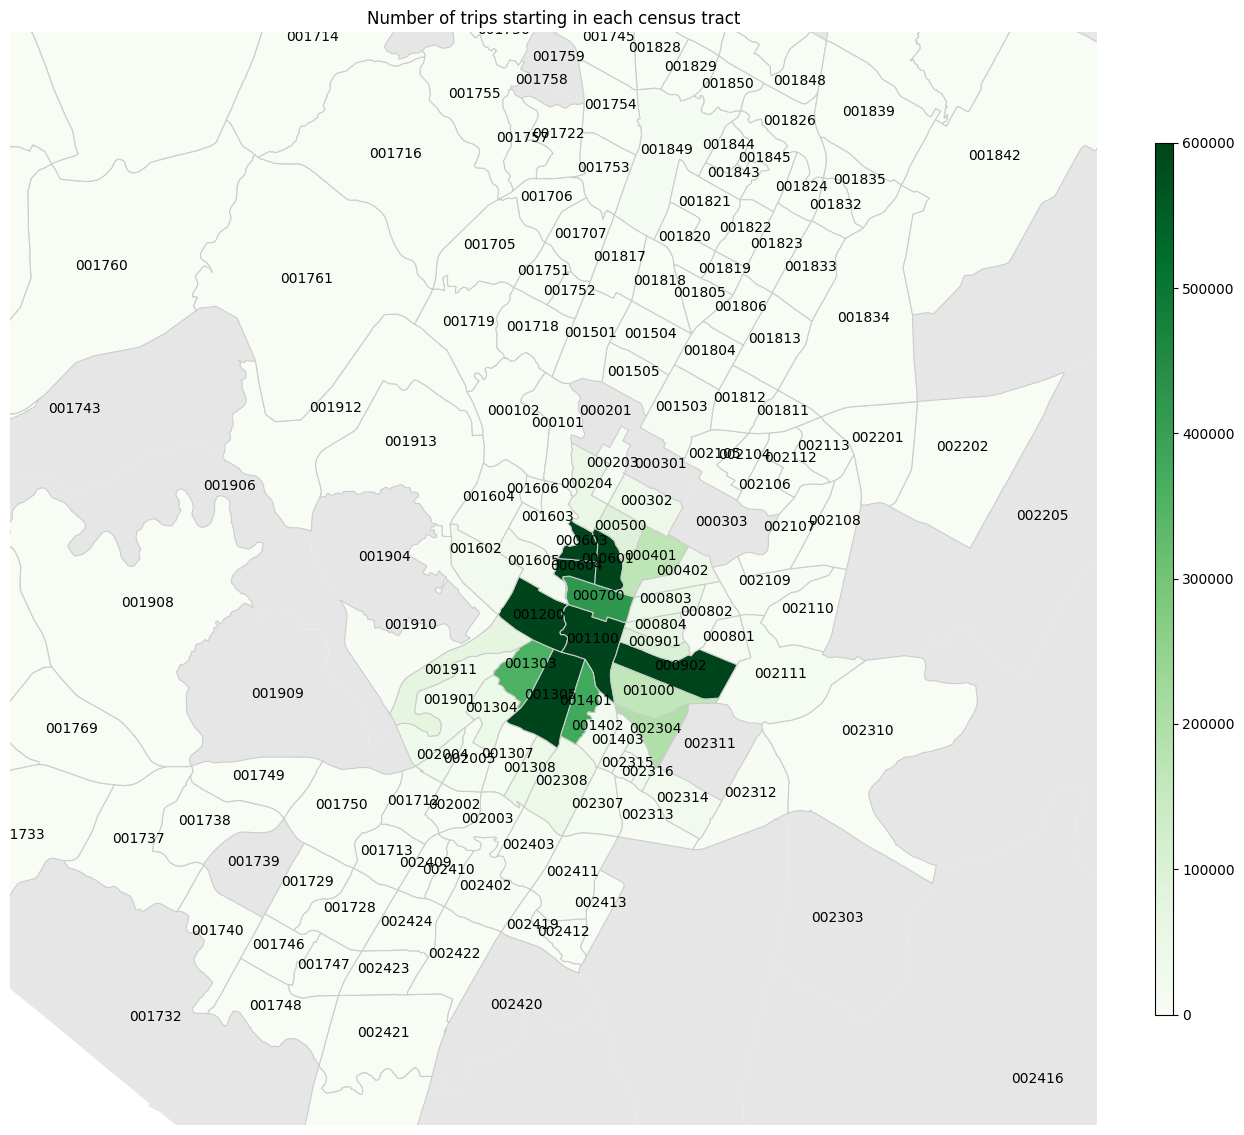

In [76]:
# Plot the census tracts from the US Census Bureau's shapefile using geopandas.
map_df = gpd.read_file('E:/junjun/predicting_scooter_utilization-master/predicting_scooter_utilization-master/ct data/tl_2010_48453_tract00/tl_2010_48453_tract00.shp')

# Convert the lat/long of the centroids to floats
map_df['INTPTLAT00'] = map_df['INTPTLAT00'].astype('float64')
map_df['INTPTLON00'] = map_df['INTPTLON00'].astype('float64')

## Create a chloropleth of census tract starts
# Plot the data retrieved in the map
ax_start = map_df.plot(color='0.9', figsize=(15, 15))

# Merge the geodataframe with the census starts dataframe
starts_plot = map_df.set_index('CTIDFP00').join(census_starts, how='inner')

# Create a min and max for color
vmax_start = 600000
vmin_start = 0

# Overlay the census tract shapes as a chloropleth
starts_plot.plot(column='Start Count', cmap='Greens', linewidth=0.8, ax=ax_start, edgecolor='0.8', 
                 vmax=vmax_start, vmin=vmin_start)

# Label the census tracts
for idx, row in map_df.iterrows():
    plt.annotate(text=row['TRACTCE00'], xy=(row['INTPTLON00'], row['INTPTLAT00']), horizontalalignment='center', 
                 clip_on=True)



# Set the limits of the plot
bbox = (-97.919881, -97.589348, 30.139918,30.426626)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])

# Remove the axis, add title, and legend
plt.axis('off')
plt.title('Number of trips starting in each census tract')
sm_start = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin_start, vmax=vmax_start))
plt.colorbar(sm_start, ax=ax_start, fraction=0.015, aspect=50)

plt.show()
plt.close()

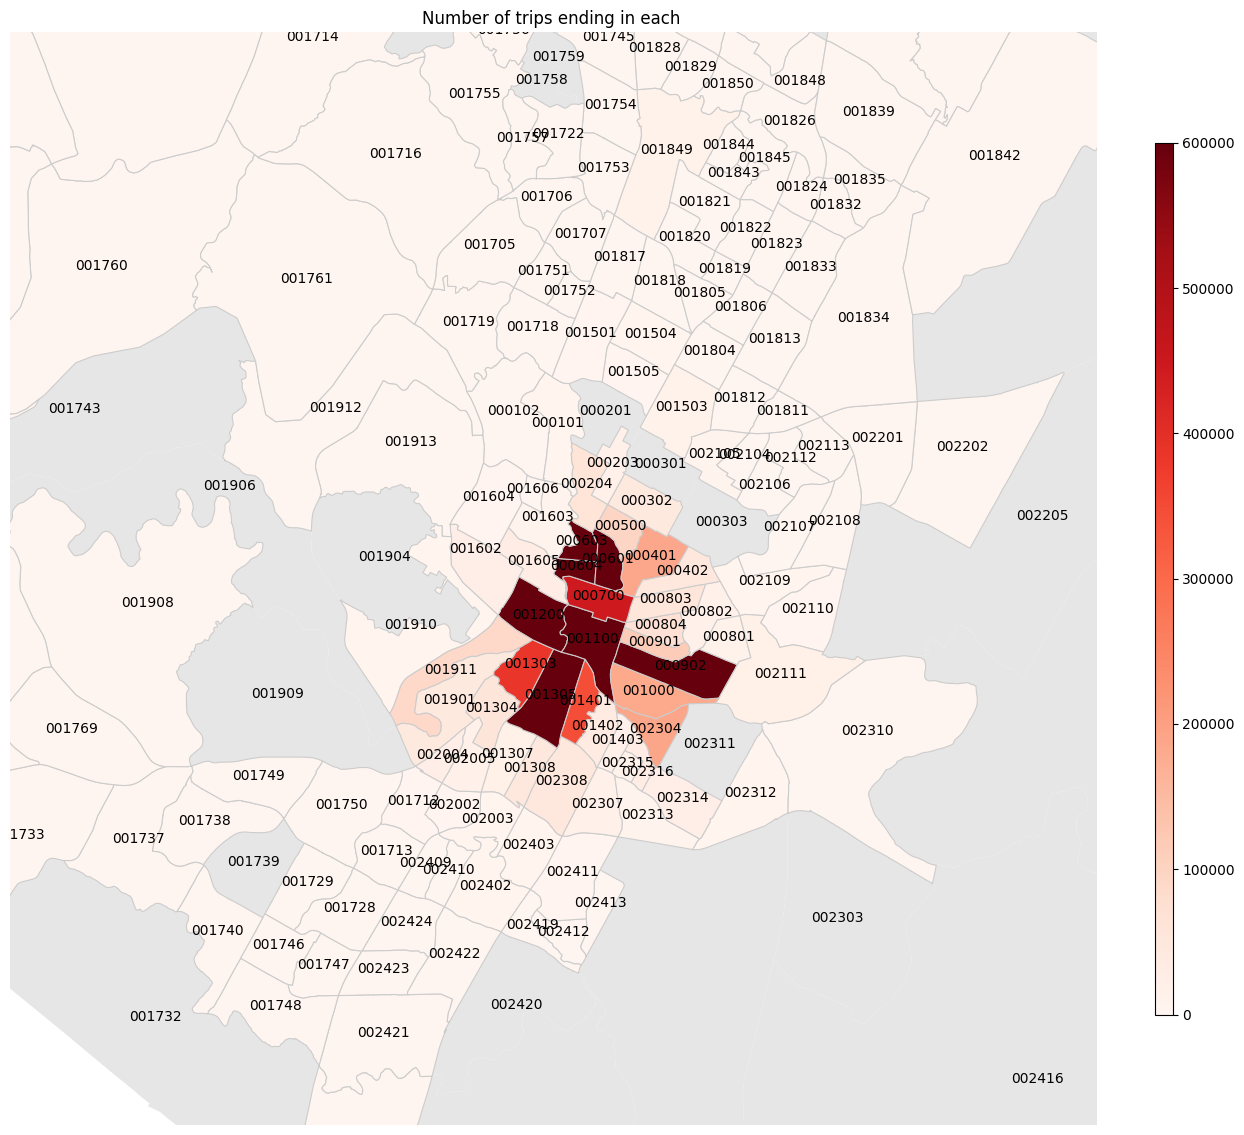

In [77]:
## Create a chloropleth of census tract starts
# Plot the data retrieved in the map
ax_end = map_df.plot(color='0.9', figsize=(15, 15))

# Merge the geodataframe with the census starts dataframe
ends_plot = map_df.set_index('CTIDFP00').join(census_ends, how='inner')

# Create a min and max for color
vmax_end = 600000
vmin_end = 0

# Overlay the census tract shapes as a chloropleth
ends_plot.plot(column='End Count', cmap='Reds', linewidth=0.8, ax=ax_end, edgecolor='0.8', 
                 vmax=vmax_end, vmin=vmin_end)

for idx, row in map_df.iterrows():
    plt.annotate(text=row['TRACTCE00'], xy=(row['INTPTLON00'], row['INTPTLAT00']), horizontalalignment='center', 
                 clip_on=True)



# Set the limits of the plot using bbox from above
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])

# Remove the axis, add title, and legend
plt.axis('off')
plt.title('Number of trips ending in each ')
sm_end = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin_end, vmax=vmax_end))
plt.colorbar(sm_end, ax=ax_end, fraction=0.015, aspect=50)

plt.show()
plt.close()

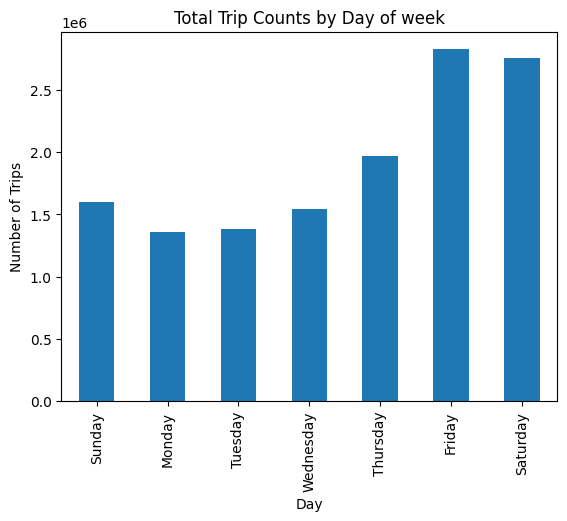

In [78]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(scooters['Day of Week'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot
daily_total.plot(kind='bar', x='Day', y='count', title='Total Trip Counts by Day of week', legend=False)
plt.ylabel('Number of Trips')
plt.show()
plt.close()

Top 4 starting location counts by day:


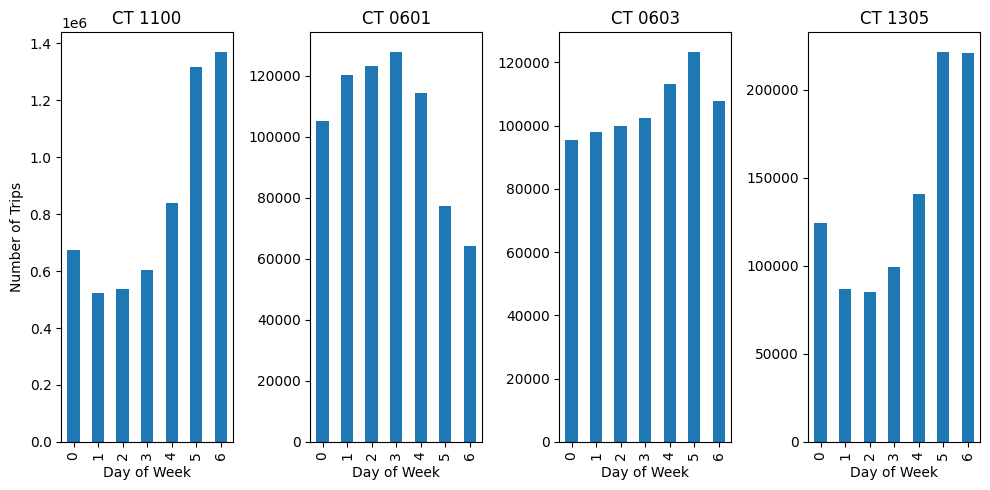

Top 4 ending location counts by day:


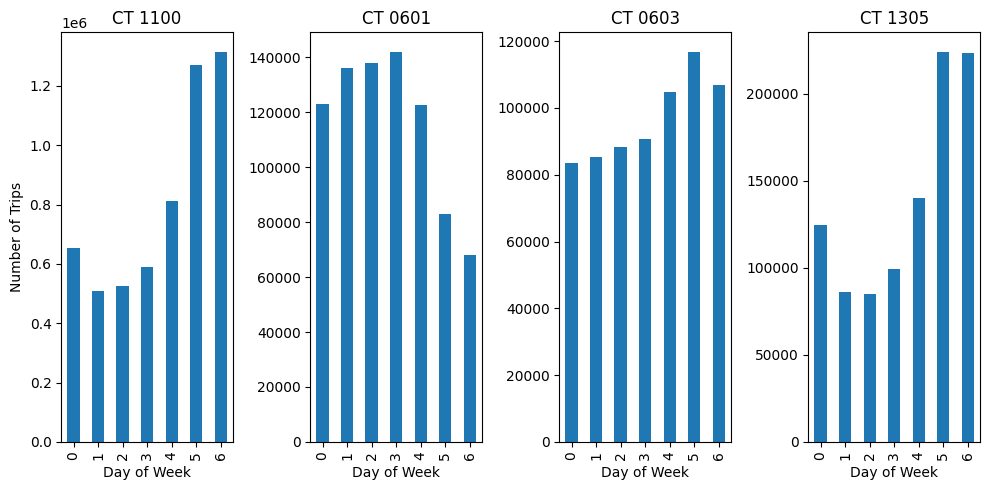

In [79]:
# Count start location by day:
weekday_start = scooters.groupby(by=['Day of Week', 'Census Tract Start']).count()

# Because the NAs are removed, the count value will be consistent throughout.  So arbitrarily use the Device ID column.
weekday_start_pivot = pd.pivot_table(weekday_start, index='Census Tract Start', values='Device ID', columns='Day of Week')

# Create plots to compare the top 4 starting locations
print('Top 4 starting location counts by day:')
plt.figure(figsize=[10, 5])

# Plot separately because the intent is to compare day to day and trends, not absolute ridership between tracts
plt.subplot(1,4,1)
weekday_start_pivot.loc['48453001100'].plot(kind='bar')
plt.title('CT 1100')
plt.ylabel('Number of Trips')

plt.subplot(1,4,2)
weekday_start_pivot.loc['48453000601'].plot(kind='bar')
plt.title('CT 0601')

plt.subplot(1,4,3)
weekday_start_pivot.loc['48453000603'].plot(kind='bar')
plt.title('CT 0603')

plt.subplot(1,4,4)
weekday_start_pivot.loc['48453001305'].plot(kind='bar')
plt.title('CT 1305')

plt.tight_layout()
plt.show()
plt.close()

# Now do the same for ending locations:
# Count end location by day:
weekday_end = scooters.groupby(by=['Day of Week', 'Census Tract End']).count()

# Because the NAs are removed, the count value will be consistent throughout each column.  So arbitrarily use the Device ID column.
weekday_end_pivot = pd.pivot_table(weekday_end, index='Census Tract End', values='Device ID', columns='Day of Week')

# Create plots to compare the top 4 ending locations
print('Top 4 ending location counts by day:')
plt.figure(figsize=[10, 5])

# Plot separately because the intent is to compare day to day and trends, not absolute ridership between tracts
plt.subplot(1,4,1)
weekday_end_pivot.loc['48453001100'].plot(kind='bar')
plt.title('CT 1100')
plt.ylabel('Number of Trips')

plt.subplot(1,4,2)
weekday_end_pivot.loc['48453000601'].plot(kind='bar')
plt.title('CT 0601')

plt.subplot(1,4,3)
weekday_end_pivot.loc['48453000603'].plot(kind='bar')
plt.title('CT 0603')

plt.subplot(1,4,4)
weekday_end_pivot.loc['48453001305'].plot(kind='bar')
plt.title('CT 1305')

plt.tight_layout()
plt.show()
plt.close()

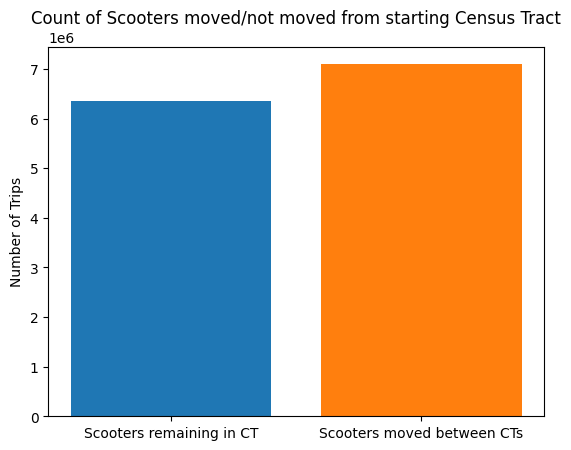

In [80]:
# Find entries where Census Tract Start and End are not equal
moved_scooters = scooters[scooters['Census Tract Start'] != scooters['Census Tract End']]
moved = moved_scooters.shape[0]

# Find entries where Census Tract Start and End are equal
stationary_scooters = scooters[scooters['Census Tract Start'] == scooters['Census Tract End']]
stationary = stationary_scooters.shape[0]

# Plot the results in a bar plot:
plt.bar('Scooters remaining in CT', moved)
plt.bar('Scooters moved between CTs', stationary)
plt.title('Count of Scooters moved/not moved from starting Census Tract')
plt.ylabel('Number of Trips')
plt.show()
plt.close()

In [81]:
scooters.columns

Index(['Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
       'Modified Date', 'Month', 'Hour', 'Day of Week',
       'Council District (Start)', 'Council District (End)', 'Year',
       'Census Tract Start', 'Census Tract End', 'Start Time', 'End Time'],
      dtype='object')

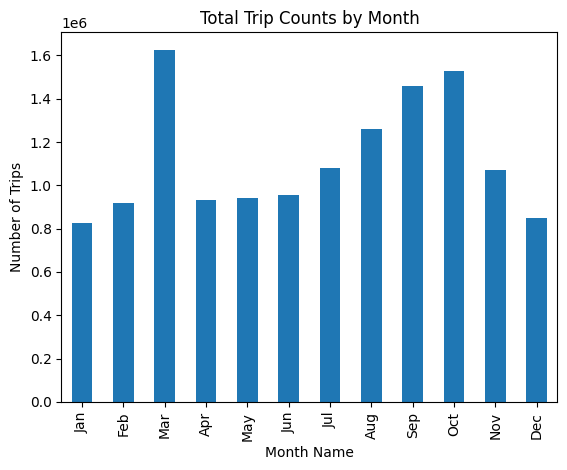

In [82]:
# Count trips per day and sort by day:
monthly_total = pd.DataFrame(scooters['Month'].value_counts().sort_index())

# Map month names for better labels.
monthly_total['Month Name'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
monthly_total.plot(kind='bar', x='Month Name', y='count', title='Total Trip Counts by Month', legend=False)
plt.ylabel('Number of Trips')
plt.show()
plt.close()

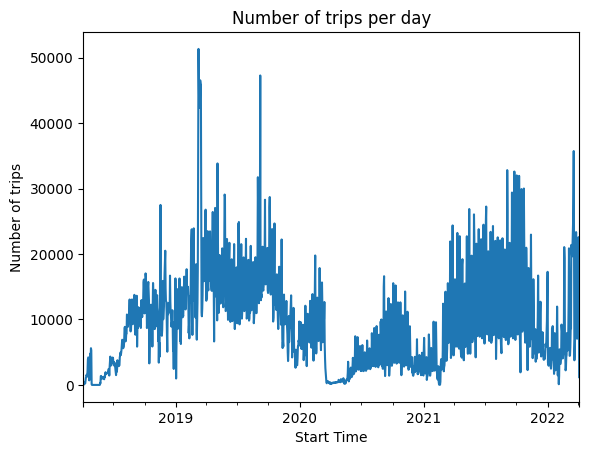

In [83]:
# Aggregate counts by day
scoots_per_day = scooters.resample('D', on='Start Time').count()

# Plot results (once again, arbitrarily using Device ID because using the count method)
scoots_per_day['Device ID'].plot()
plt.title('Number of trips per day')
plt.ylabel('Number of trips')
plt.show()
plt.close()

In [84]:
scooters

Device ID  \
ID                                                                           
5a23a573-418b-443b-8dc8-d7963fe2b063  5cee599e-832c-4fa5-9050-dcc00e3790f3   
dac12ecc-0f79-4faa-a626-674a7c9f3df2  20014eea-19b2-4643-b3b3-63c31e76e57b   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e  2cad7083-7af6-4b22-8540-9b9dfffc2f58   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb  fde91af9-deb8-41cc-9ddc-472ff7653d90   
258bea73-5b14-4970-950e-1a1a7c3d715f  b748cae7-7f46-48a7-834d-980565210bf6   
...                                                                    ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c  e19ae320-f29f-4771-97ec-feed9d5b1328   
1b6c2dd0-7136-4863-94ac-f2c98f390139  06e372b9-0d54-4c21-b7e5-4102d57debcd   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd  17c741fd-373b-4af9-ae84-c70eda4dc341   
c77cceda-9ab8-4699-a06d-d96569a961ee  1e6cfd15-76cb-4fc5-a237-3e73a7ccc342   
e407b61d-cf55-4a07-bcb3-66498c76394f  18470ae6-a759-4af6-867a-a6ad9f6cc4b1   

                                     Vehicle Type  Trip Duration  \
ID                                                                 
5a23a573-418b-443b-8dc8-d7963fe2b063      scooter         2184.0   
dac12ecc-0f79-4faa-a626-674a7c9f3df2      scooter          705.0   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e      scooter          189.0   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb      scooter          203.0   
258bea73-5b14-4970-950e-1a1a7c3d715f      scooter          166.0   
...                                           ...            ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c      scooter          321.0   
1b6c2dd0-7136-4863-94ac-f2c98f390139      scooter          184.0   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd      scooter         1323.0   
c77cceda-9ab8-4699-a06d-d96569a961ee      scooter         2422.0   
e407b61d-cf55-4a07-bcb3-66498c76394f      scooter          602.0   

                                      Trip Distance       Modified Date  \
ID                                                                        
5a23a573-418b-443b-8dc8-d7963fe2b063    4254.483965 2021-11-03 03:16:12   
dac12ecc-0f79-4faa-a626-674a7c9f3df2    2670.868099 2021-11-03 03:16:12   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e     258.938744 2021-11-03 03:16:10   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb     354.088194 2021-11-03 03:16:11   
258bea73-5b14-4970-950e-1a1a7c3d715f     757.000000 2022-02-08 03:12:27   
...                                             ...                 ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c    1095.000000 2022-03-21 23:15:37   
1b6c2dd0-7136-4863-94ac-f2c98f390139     710.000000 2022-03-21 23:15:37   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd    4492.000000 2022-03-20 05:18:20   
c77cceda-9ab8-4699-a06d-d96569a961ee    3104.000000 2022-03-20 05:18:20   
e407b61d-cf55-4a07-bcb3-66498c76394f    2222.000000 2022-03-20 05:18:20   

                                      Month  Hour  Day of Week  \
ID                                                               
5a23a573-418b-443b-8dc8-d7963fe2b063     11     1            1   
dac12ecc-0f79-4faa-a626-674a7c9f3df2     11     1            1   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e     11     1            1   
3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb     11     1            1   
258bea73-5b14-4970-950e-1a1a7c3d715f      1    17            6   
...                                     ...   ...          ...   
8cbb4b49-a349-43d6-a7a1-4f09babf626c      3    22            6   
1b6c2dd0-7136-4863-94ac-f2c98f390139      3    22            6   
40ad2a54-b0c6-441f-87a1-e0b3349e75fd      3     4            5   
c77cceda-9ab8-4699-a06d-d96569a961ee      3     4            5   
e407b61d-cf55-4a07-bcb3-66498c76394f      3     4            5   

                                      Council District (Start)  \
ID                                                               
5a23a573-418b-443b-8dc8-d7963fe2b063                       9.0   
dac12ecc-0f79-4faa-a626-674a7c9f3df2                       3.0   
d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e                       1.0   


In [85]:
scooters = scooters.drop("Hour", axis='columns')

In [86]:
scooters['Hour'] = scooters['Start Time'].dt.hour

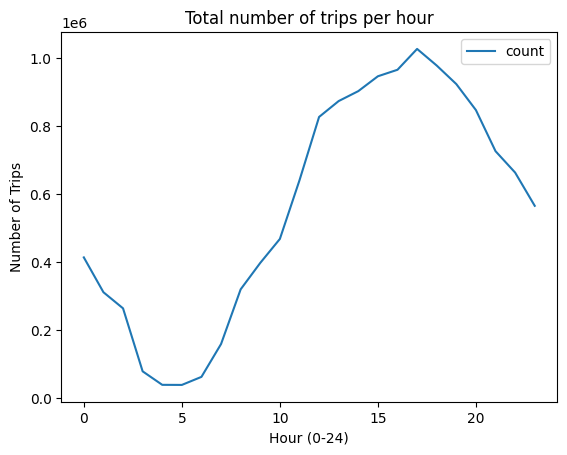

In [87]:
# Aggregate total counts by hour
scoots_per_hour = pd.DataFrame(scooters['Hour'].value_counts().sort_index())

# Plot results (once again, arbitrarily using Device ID)
scoots_per_hour.plot()
plt.title('Total number of trips per hour')
plt.xlabel('Hour (0-24)')
plt.ylabel('Number of Trips')
plt.show()
plt.close()

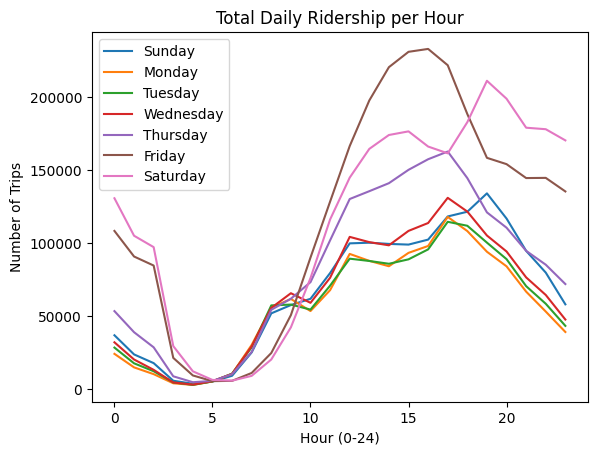

In [88]:
# Create a DataFrame grouped by Hour and day of week
scoots_hour_day = scooters.groupby(by=['Hour', 'Day of Week']).count()

# Create a pivot table with the days of the week as columns. Use the Device ID to maintain the count.
scoots_hour_day = scoots_hour_day.reset_index().pivot(index='Hour', columns='Day of Week', values='Device ID')

# Rename the columns to the verbal days of the week
scoots_hour_day.columns = days

# Plot the result
scoots_hour_day.plot()

plt.title('Total Daily Ridership per Hour')
plt.xlabel('Hour (0-24)')
plt.ylabel('Number of Trips')
plt.show()
plt.close() 

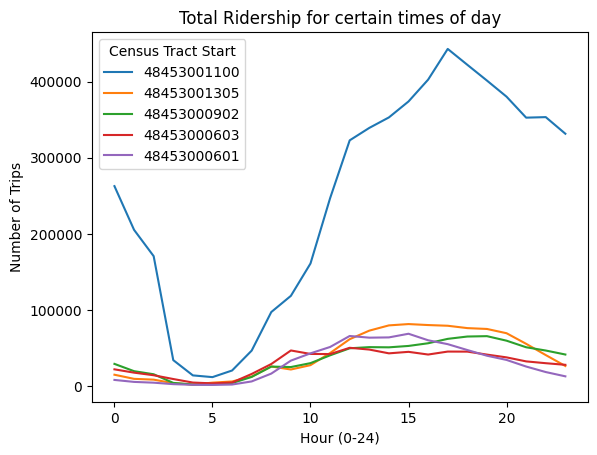

In [89]:
# Create a DataFrame grouped by Hour and day of week
scoots_hour_cts = scooters.groupby(by=['Hour', 'Census Tract Start']).count()

# Create a pivot table with the days of the week as columns. Use the Device ID to maintain the count.
scoots_hour_cts = scoots_hour_cts.reset_index().pivot(index='Hour', columns='Census Tract Start', values='Device ID')

# Plot the result for the top 5 census tracts
scoots_hour_cts[list(census_comp.head(5).index)].plot()

plt.title('Total Ridership for certain times of day')
plt.xlabel('Hour (0-24)')
plt.ylabel('Number of Trips')
plt.show()
plt.close() 

In [90]:
# Import centroids file, which I created from US census bureau's TIGER shapefile using QGIS.
centroids_dtypes = {'CTIDFP00': str}
centroids = pd.read_csv('centroids.txt', dtype=centroids_dtypes)
centroids.head()
# Drop unneeded columns
centroids = centroids.drop(['STATEFP00', 'COUNTYFP00', 'TRACTCE00', 'NAME00', 'NAMELSAD00', 
                            'MTFCC00', 'FUNCSTAT00', 'ALAND00', 'AWATER00'],
                          axis=1)

# Perform 1st join for start locations.  Left join because we want to keep all values in scooters 
scooters = pd.merge(scooters, centroids, how='left', left_on='Census Tract Start', 
                    right_on='CTIDFP00', copy=False)
scooters = scooters.drop('CTIDFP00', axis=1)

# Rename columns
scooters = scooters.rename(columns={'INTPTLAT00': 'start_lat', 'INTPTLON00': 'start_long'}, 
                           copy=False)


# Perform 2nd join for end locations. Also a left join
scooters = pd.merge(scooters, centroids, how='left', left_on='Census Tract End', 
                    right_on='CTIDFP00', copy=False)
scooters = scooters.drop('CTIDFP00', axis=1)

# Rename columns
scooters = scooters.rename(columns={'INTPTLAT00': 'end_lat', 'INTPTLON00': 'end_long'}, 
                           copy=False)

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString

def plot_trips(df, census_tract, bbox, color='Blues', vmin_trips=0, vmax_quantile=0.75, linewidth=3):
    '''
    Function that plots all of the trips that originated in the specified census tract.
    Keyword Arguments
    ------------------
    df : DataFrame
        Source dataframe
    census_tract : str
        11-digit census tract number
    color : str
        Matplotlib colormap code
    bbox : list or array (optional)
        Bounding box of the desired map extents
    vmin_trips: int (optional)
        Minimum number of trips for color display (default 0)
    vmax_quantile: float from 0 to 1
        Maximum quantile to use for color display.
    linewidth: float or int (optional)
        linewidth for plotting
    '''

    # Create a dataframe from the desired census tract
    lines = df.loc[df['Census Tract Start'] == census_tract][['Census Tract Start', 'Census Tract End', 'start_lat', 'start_long', 
                  'end_lat', 'end_long']].copy()

    # Count the census tract ends
    line_vals = pd.DataFrame(lines['Census Tract End'].value_counts())
    
    # Rename the values columns
    line_vals.columns = ['CT End Count']

    # Merge the line vals with 
    line_intensity = pd.merge(pd.DataFrame(line_vals), lines, how='inner', left_index=True, right_on='Census Tract End')

    # Drop duplicates
    line_intensity = line_intensity.drop_duplicates()
    
    # Convert the lat/long data in the dataframe to linestrings
    line_intensity['geometry'] = line_intensity.apply(lambda x: LineString([(x['start_long'], x['start_lat']) , 
                                                      (x['end_long'], x['end_lat'])]), axis = 1)

    # Create the geopandas geodataframe.
    line_intensity = gpd.GeoDataFrame(line_intensity, geometry='geometry')
    
    # Plot the base map
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_xlim(bbox[0], bbox[1])
    ax.set_ylim(bbox[2], bbox[3])
    map_df.plot(color='0.9', edgecolor='0', ax=ax)

    # Resort so that smallest CT End Counts are plotted first
    line_intensity = line_intensity.sort_values(by='CT End Count')
    
    # Set vmax to limit the max color to the vmax_quantile 
    vmax_trips = line_intensity['CT End Count'].quantile(vmax_quantile)
  
    # Plot the lines
    line_intensity.plot(column='CT End Count', 
                        cmap=color, 
                        linewidth=linewidth, 
                        ax=ax, 
                        vmin=vmin_trips, 
                        vmax=vmax_trips)
    
    # Add a color bar
    sm_trips = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin_trips, vmax=vmax_trips))
    cbar = fig.colorbar(sm_trips, ax=ax, fraction=0.015, aspect=50)
    cbar.set_label('Number of trips (maximum includes values shown and above)')

    # Add a title and show
    plt.title('Trips originating in ' + str(census_tract))
    
    # Remove axes
    plt.axis('off')
    
    plt.show()
    plt.close()

# Example usage (assuming you have the necessary data)
# plot_trips(scooters, '12345678901', bbox=[-74, -73, 40, 41], color='Blues')


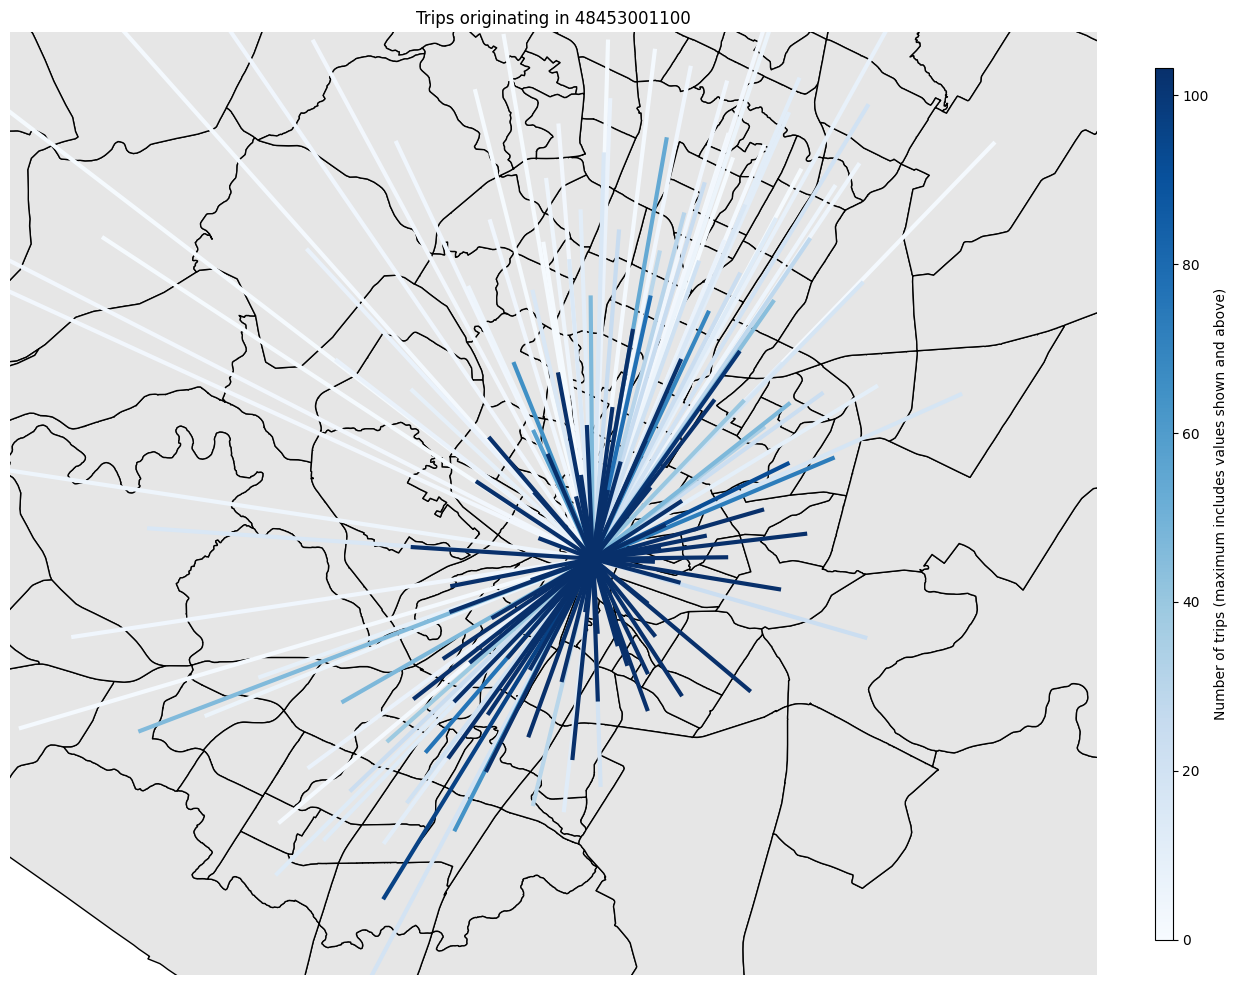

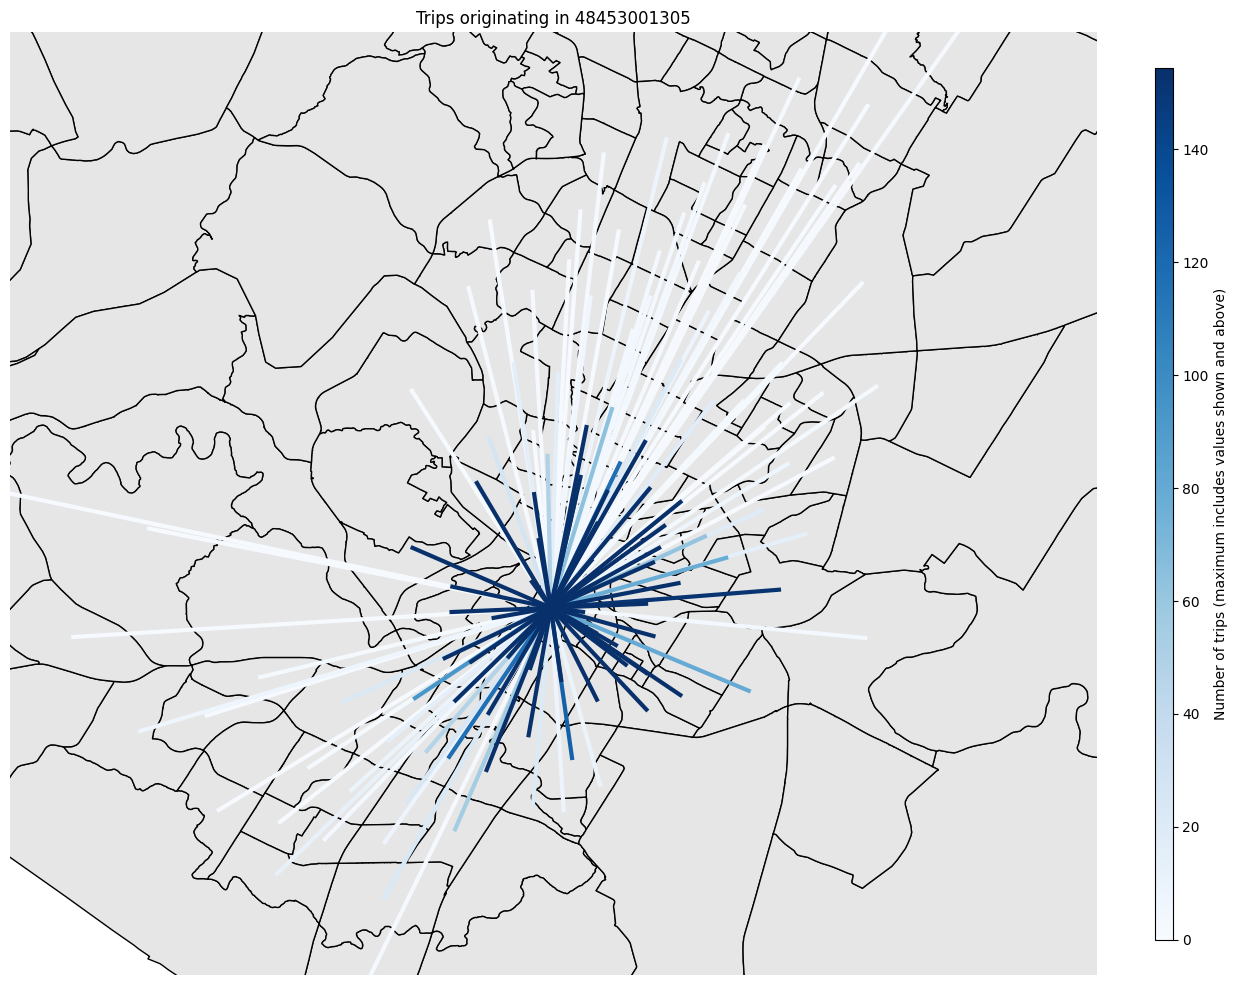

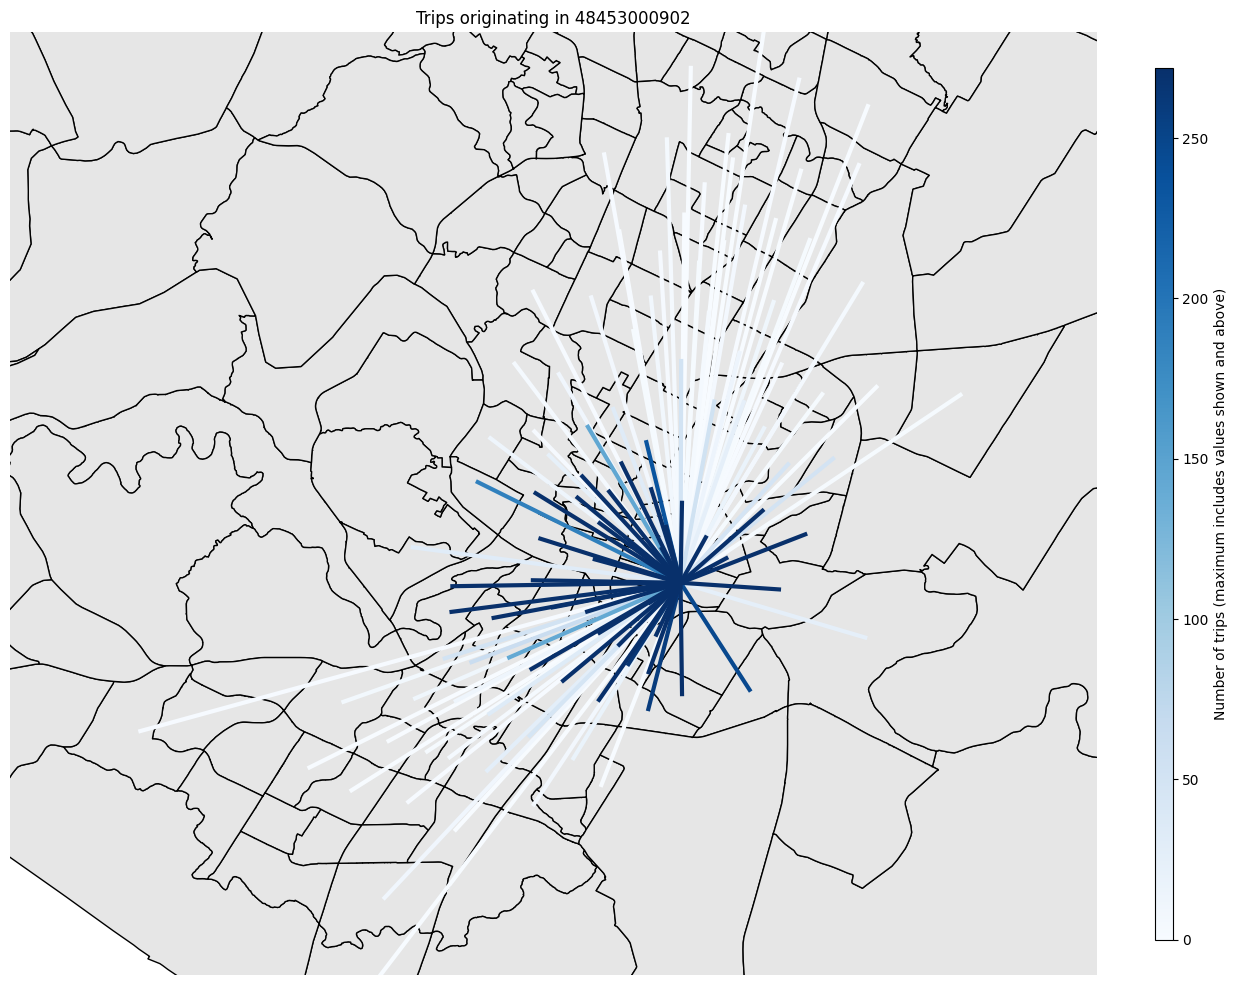

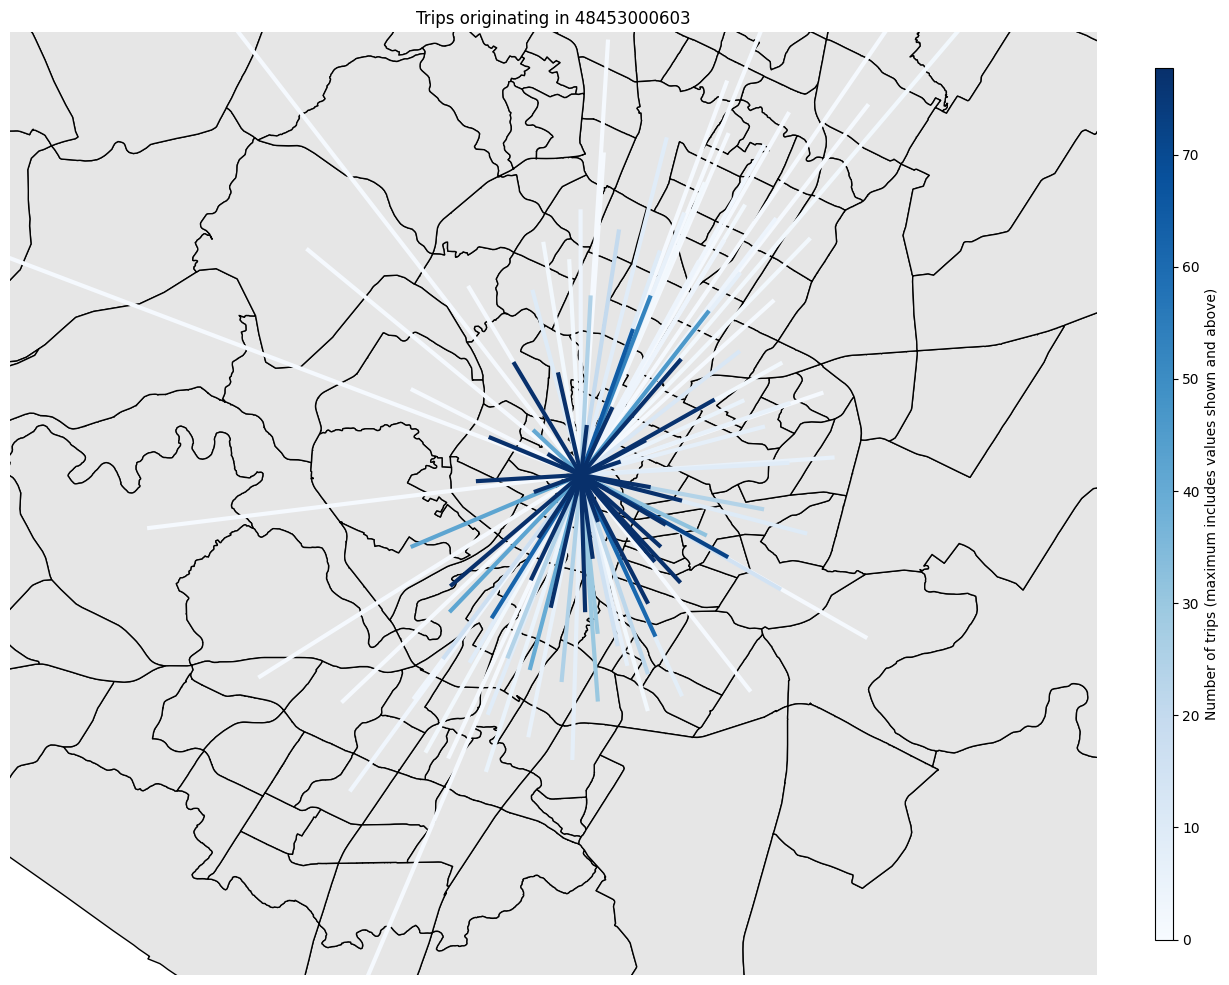

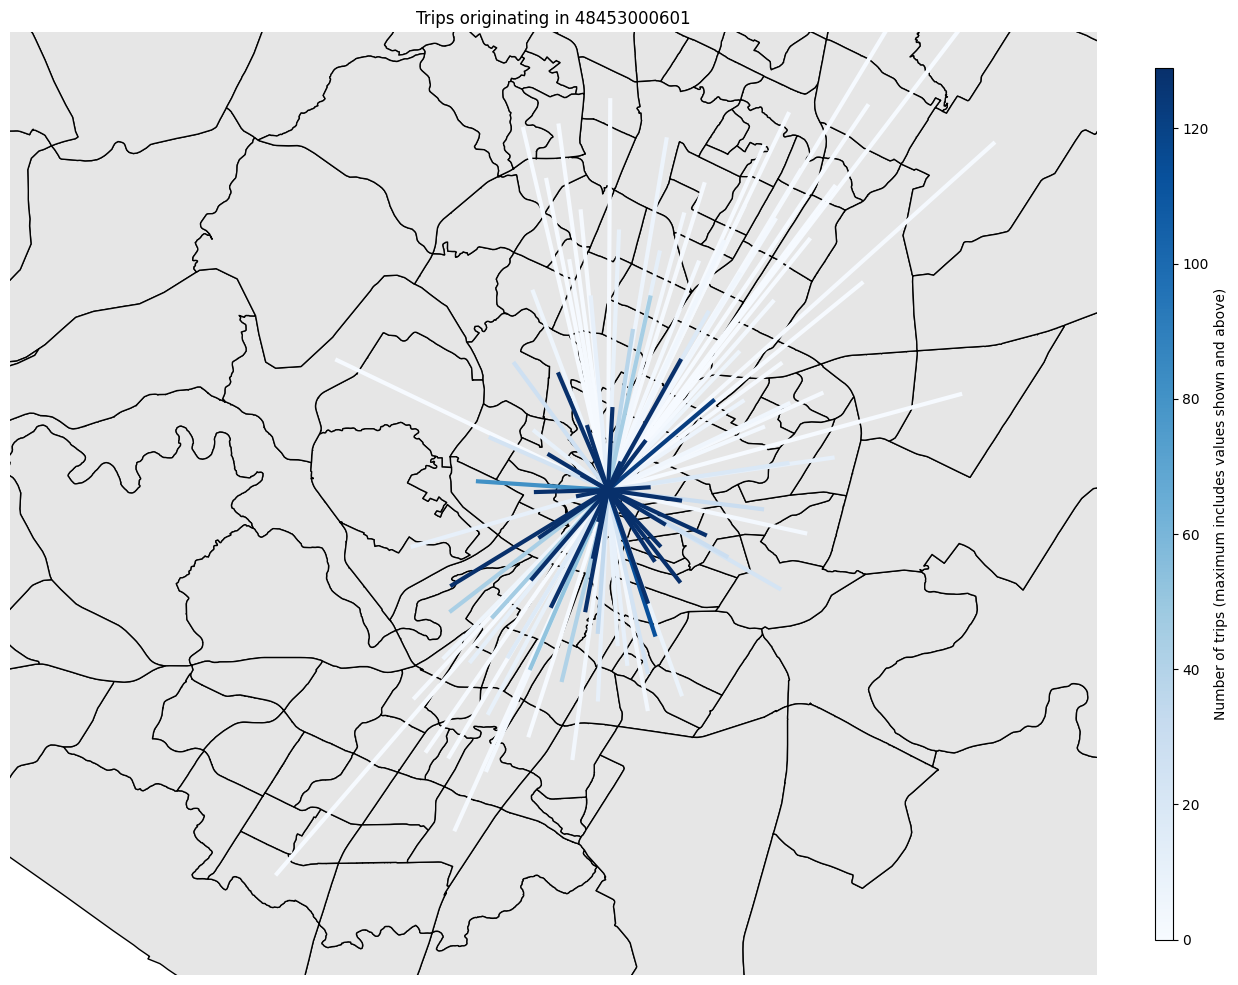

In [92]:
# Create plots of the top 4 census tracts
for i, val in census_starts.head().iterrows():
     plot_trips(scooters, i, bbox=bbox, color='Blues')

In [93]:
scooters

Device ID Vehicle Type  Trip Duration  \
0         5cee599e-832c-4fa5-9050-dcc00e3790f3      scooter         2184.0   
1         20014eea-19b2-4643-b3b3-63c31e76e57b      scooter          705.0   
2         2cad7083-7af6-4b22-8540-9b9dfffc2f58      scooter          189.0   
3         fde91af9-deb8-41cc-9ddc-472ff7653d90      scooter          203.0   
4         b748cae7-7f46-48a7-834d-980565210bf6      scooter          166.0   
...                                        ...          ...            ...   
13447344  e19ae320-f29f-4771-97ec-feed9d5b1328      scooter          321.0   
13447345  06e372b9-0d54-4c21-b7e5-4102d57debcd      scooter          184.0   
13447346  17c741fd-373b-4af9-ae84-c70eda4dc341      scooter         1323.0   
13447347  1e6cfd15-76cb-4fc5-a237-3e73a7ccc342      scooter         2422.0   
13447348  18470ae6-a759-4af6-867a-a6ad9f6cc4b1      scooter          602.0   

          Trip Distance       Modified Date  Month  Day of Week  \
0           4254.483965 2021-11-03 03:16:12     11            1   
1           2670.868099 2021-11-03 03:16:12     11            1   
2            258.938744 2021-11-03 03:16:10     11            1   
3            354.088194 2021-11-03 03:16:11     11            1   
4            757.000000 2022-02-08 03:12:27      1            6   
...                 ...                 ...    ...          ...   
13447344    1095.000000 2022-03-21 23:15:37      3            6   
13447345     710.000000 2022-03-21 23:15:37      3            6   
13447346    4492.000000 2022-03-20 05:18:20      3            5   
13447347    3104.000000 2022-03-20 05:18:20      3            5   
13447348    2222.000000 2022-03-20 05:18:20      3            5   

          Council District (Start)  Council District (End)  Year  \
0                              9.0                     9.0  2021   
1                              3.0                     9.0  2021   
2                              1.0                     1.0  2021   
3                              1.0                     9.0  2021   
4                              9.0                     9.0  2022   
...                            ...                     ...   ...   
13447344                       9.0                     9.0  2022   
13447345                       3.0                     3.0  2022   
13447346                       9.0                     5.0  2022   
13447347                       9.0                     9.0  2022   
13447348                       9.0                     9.0  2022   

         Census Tract Start Census Tract End          Start Time  \
0               48453001100      48453001100 2021-11-01 19:45:00   
1               48453000902      48453001100 2021-11-01 20:30:00   
2               48453001100      48453001100 2021-11-01 20:15:00   
3               48453001100      48453001100 2021-11-01 20:30:00   
4               48453000604      48453000603 2022-01-30 11:45:00   
...                     ...              ...                 ...   
13447344        48453001200      48453001100 2022-03-20 17:30:00   
13447345        48453002304      48453002318 2022-03-20 17:45:00   
13447346        48453001200      48453001304 2022-03-18 22:45:00   
13447347        48453001305      48453001100 2022-03-18 22:30:00   
13447348        48453001100      48453001100 2022-03-18 23:00:00   

                    End Time  Hour  start_lat  start_long    end_lat  \
0        2021-11-01 20:15:00    19  30.266479  -97.742663  30.266479   
1        2021-11-01 20:30:00    20  30.259192  -97.715970  30.266479   
2        2021-11-01 20:30:00    20  30.266479  -97.742663  30.266479   
3        2021-11-01 20:30:00    20  30.266479  -97.742663  30.266479   
4        2022-01-30 11:45:00    11  30.285465  -97.747765  30.291991   
...                      ...   ...        ...         ...        ...   
13447344 2022-03-20 17:45:00    17  30.272783  -97.759185  30.266479   
13447345 2022-03-20 17:45:00    17  30.242832  -97.723595        NaN   
13447346 2022

In [94]:
scooters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13447349 entries, 0 to 13447348
Data columns (total 19 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Device ID                 object        
 1   Vehicle Type              category      
 2   Trip Duration             float64       
 3   Trip Distance             float64       
 4   Modified Date             datetime64[ns]
 5   Month                     int8          
 6   Day of Week               int8          
 7   Council District (Start)  float64       
 8   Council District (End)    float64       
 9   Year                      int16         
 10  Census Tract Start        object        
 11  Census Tract End          object        
 12  Start Time                datetime64[ns]
 13  End Time                  datetime64[ns]
 14  Hour                      int32         
 15  start_lat                 float64       
 16  start_long                float64       
 17  end_la

In [95]:
import pandas as pd
from datetime import datetime


# 将 datetime 对象格式化为 "年-月-日 时"
scooters['date_hour'] = scooters['Start Time'].apply(lambda x: x.strftime('%Y-%m-%d %H'))



In [96]:
new_scooters = scooters.groupby(['date_hour', 'Census Tract Start']).size().reset_index(name='count')

In [97]:
new_scooters

date_hour Census Tract Start  count
0       2018-04-03 18        48453001738      1
1       2018-04-04 15        48453001200      1
2       2018-04-04 17        48453001100      1
3       2018-04-05 05        48453001305      1
4       2018-04-05 08        48453001305      2
...               ...                ...    ...
858599  2022-04-04 10        48453001911      3
858600  2022-04-04 10        48453001919      1
858601  2022-04-04 10        48453002304      1
858602  2022-04-04 10        48453002316      1
858603  2022-04-04 10        48453002317      1

[858604 rows x 3 columns]

In [98]:
new_scooters

date_hour Census Tract Start  count
0       2018-04-03 18        48453001738      1
1       2018-04-04 15        48453001200      1
2       2018-04-04 17        48453001100      1
3       2018-04-05 05        48453001305      1
4       2018-04-05 08        48453001305      2
...               ...                ...    ...
858599  2022-04-04 10        48453001911      3
858600  2022-04-04 10        48453001919      1
858601  2022-04-04 10        48453002304      1
858602  2022-04-04 10        48453002316      1
858603  2022-04-04 10        48453002317      1

[858604 rows x 3 columns]

In [99]:
new_scooters.to_csv('new_scooters.csv', index=False)

In [ ]:
data

In [ ]:
data.info()

In [ ]:
max_date = data['Start Time'].max()
min_date = data['Start Time'].min()

In [ ]:
max_date

In [ ]:
min_date

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

def get_historical_weather(api_key, query, historical_date):
    historical_endpoint = "http://api.weatherstack.com/historical"
    params = {
        'access_key': api_key,
        'query': query,
        'historical_date': historical_date,
        'units': 'm',
        'hourly': '1'
    }
    response = requests.get(historical_endpoint, params=params)
    return response.json()

weather_data_list = []

start_date = datetime(2018, 4, 3)
end_date = datetime(2022, 4, 4)
delta = timedelta(days=1)


api_key = "b33417898ee5675ed14253b1a566a6d1"
location_query = "Austin"


current_date = start_date
while current_date <= end_date:
    historical_date = current_date.strftime('%Y-%m-%d')
    weather_response = get_historical_weather(api_key, location_query, historical_date)

    if 'historical' in weather_response and historical_date in weather_response['historical']:
        daily_data = weather_response['historical'][historical_date]
        weather_data = {
            'date': historical_date,
            'temperature': daily_data['avgtemp'],
            'feels_like': daily_data['hourly'][0]['feelslike'],
            'weather_description': daily_data['hourly'][0]['weather_descriptions'][0],
            'humidity': daily_data['hourly'][0]['humidity'], 
            'wind_speed': daily_data['hourly'][0]['wind_speed']  
        }
        weather_data_list.append(weather_data)

    current_date += delta

weather_df = pd.DataFrame(weather_data_list)

print(weather_df.head())
weather_df.to_csv('Austin_weather_df.csv', index=False)

In [ ]:
data['Start Time'] = pd.to_datetime(data['Start Time']).dt.date
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

Austin = pd.merge(data, weather_df, left_on='Start Time', right_on='date', how='left')

print(Austin.head())

In [ ]:
import pandas as pd
import holidays


Austin['date'] = pd.to_datetime(Austin['date'])


US_holidays = holidays.US(years=Austin['date'].dt.year.unique())


Austin['is_holiday'] = Austin['date'].apply(lambda x: 1 if x in US_holidays else 0)


print(Austin)

In [ ]:

'''1==Clear Skies, 2==Cloudy, 3==Light Precipitation, 4 ==Heavy Precipitation, 5==Other'''

def categorize_weather(condition):
    if condition == 'Clear':
        return 1
    elif condition in ['Partly cloudy', 'Overcast', 'Cloudy']:
        return 2
    elif condition in ['Light rain', 'Patchy rain possible', 'Light drizzle', 'Light rain shower']:
        return 3
    elif condition in ['Moderate or heavy rain shower', 'Heavy rain at times', 'Moderate rain at times']:
        return 4
    else:
        return 5

Austin['weather_category'] = Austin['weather_description'].apply(categorize_weather)

print(Austin['weather_category'].unique())

In [ ]:
Austin['Census Tract Start'] = Austin['Census Tract Start'].astype(str)
Austin['Census Tract End'] = Austin['Census Tract End'].astype(str)

In [ ]:
Austin['zone_start'] = Austin['Census Tract Start'].str[-4:]
Austin['zone_end'] = Austin['Census Tract End'].str[-4:]

In [ ]:
Austin.info()

In [ ]:
Austin_data = Austin[['Month','Day of Week','zone_end','Year','zone_start','Hour','date_hour','count','temperature','feels_like','humidity',
                     'wind_speed','is_holiday','weather_category']]

In [ ]:
Austin_data.to_csv('Austin_data.csv', index=False)

In [ ]:
Austin_data

In [ ]:
Austin_data_new = Austin[Austin['Year'].isin([2020, 2021, 2022])]


In [ ]:
df = df.groupby('date_hour').size().reset_index(name='count')